In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df= pd.read_csv('Position_Salaries.csv')

In [ ]:
df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


In [ ]:
df.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


In [ ]:
X=df.iloc[:,1:-1]
y=df.iloc[:,-1]

In [ ]:
X.values

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [ ]:
y.values

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000])

In [ ]:
from sklearn.tree import DecisionTreeRegressor
model=DecisionTreeRegressor(random_state=0,max_depth=2)
model.fit(X,y)

DecisionTreeRegressor(max_depth=2, random_state=0)

In [ ]:
from sklearn.tree import export_text
text=export_text(model)
print(text)

|--- feature_0 <= 8.50
|   |--- feature_0 <= 6.50
|   |   |--- value: [82500.00]
|   |--- feature_0 >  6.50
|   |   |--- value: [250000.00]
|--- feature_0 >  8.50
|   |--- feature_0 <= 9.50
|   |   |--- value: [500000.00]
|   |--- feature_0 >  9.50
|   |   |--- value: [1000000.00]



[Text(0.5, 0.8333333333333334, 'Position <= 8.5\nsquared_error = 80662250000.0\nsamples = 10\nvalue = 249500.0'), Text(0.25, 0.5, 'Position <= 6.5\nsquared_error = 6921484375.0\nsamples = 8\nvalue = 124375.0'), Text(0.125, 0.16666666666666666, 'squared_error = 1381250000.0\nsamples = 6\nvalue = 82500.0'), Text(0.375, 0.16666666666666666, 'squared_error = 2500000000.0\nsamples = 2\nvalue = 250000.0'), Text(0.75, 0.5, 'Position <= 9.5\nsquared_error = 62500000000.0\nsamples = 2\nvalue = 750000.0'), Text(0.625, 0.16666666666666666, 'squared_error = 0.0\nsamples = 1\nvalue = 500000.0'), Text(0.875, 0.16666666666666666, 'squared_error = 0.0\nsamples = 1\nvalue = 1000000.0')]


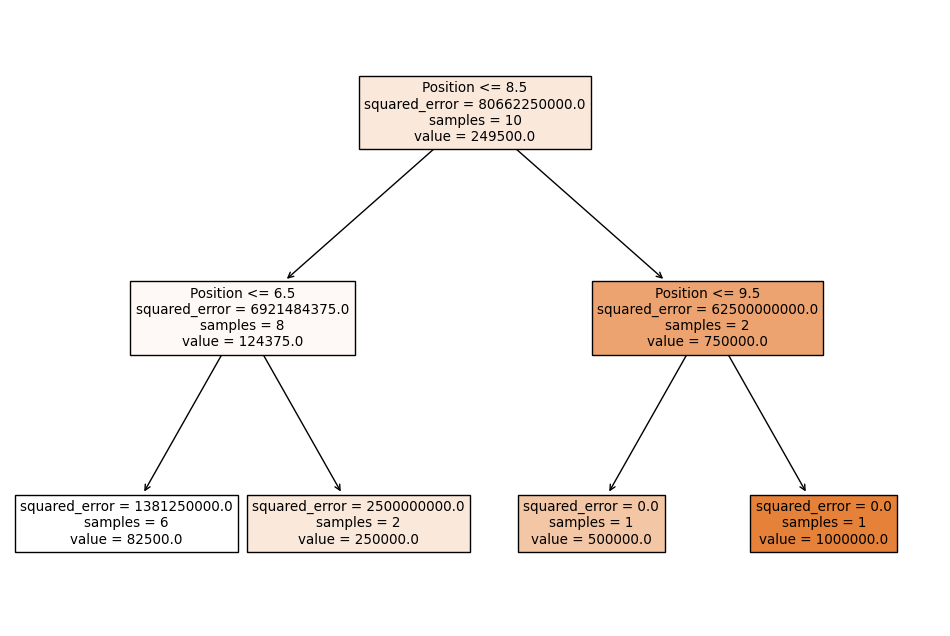

In [ ]:
from sklearn.tree import plot_tree
fig=plt.figure(figsize=(12,8),dpi=100)
visiualization =plot_tree(model,feature_names=df.columns,filled=True)
print(visiualization)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


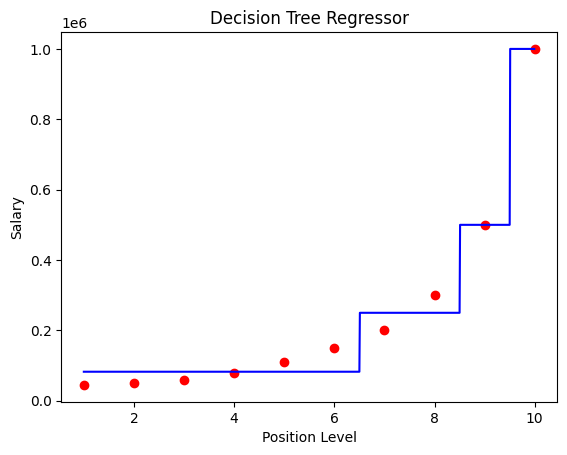

In [ ]:
x_grid=np.arange(min(X.values),max(X.values),0.01)
x_grid=x_grid.reshape(len(x_grid),1)
plt.scatter(X,y,color='red')
plt.plot(x_grid,model.predict(x_grid),color='blue')
plt.title("Decision Tree Regressor")
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

In [ ]:
df2=pd.read_csv('Carseats.csv')

In [ ]:
df2

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [ ]:
df2.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [ ]:
df2.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [ ]:
df2.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [ ]:
df2["ShelveLoc"].unique()

array(['Bad', 'Good', 'Medium'], dtype=object)

In [ ]:
df2["ShelveLoc"]=df2["ShelveLoc"].map({"Bad":1,"Good":2,"Medium":3})
df2["US"]=df2["US"].map({"Yes":1,"No":2})
df2["Urban"]=df2["Urban"].map({"Yes":1,"No":2})

In [ ]:
df2

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,1,42,17,1,1
1,11.22,111,48,16,260,83,2,65,10,1,1
2,10.06,113,35,10,269,80,3,59,12,1,1
3,7.40,117,100,4,466,97,3,55,14,1,1
4,4.15,141,64,3,340,128,1,38,13,1,2
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,2,33,14,1,1
396,6.14,139,23,3,37,120,3,55,11,2,1
397,7.41,162,26,12,368,159,3,40,18,1,1
398,5.94,100,79,7,284,95,1,50,12,1,1


In [ ]:
X=df2[['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US']]
X

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,1,42,17,1,1
1,11.22,111,48,16,260,83,2,65,10,1,1
2,10.06,113,35,10,269,80,3,59,12,1,1
3,7.40,117,100,4,466,97,3,55,14,1,1
4,4.15,141,64,3,340,128,1,38,13,1,2
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,2,33,14,1,1
396,6.14,139,23,3,37,120,3,55,11,2,1
397,7.41,162,26,12,368,159,3,40,18,1,1
398,5.94,100,79,7,284,95,1,50,12,1,1


In [ ]:
y=df2['Price']
y

0      120
1       83
2       80
3       97
4      128
      ... 
395    128
396    120
397    159
398     95
399    120
Name: Price, Length: 400, dtype: int64

In [ ]:
from sklearn.tree import DecisionTreeRegressor
model=DecisionTreeRegressor(random_state=0,max_depth=2)
model.fit(X,y)

DecisionTreeRegressor(max_depth=2, random_state=0)

In [ ]:
from sklearn.tree import export_text
text=export_text(model)
print(text)

|--- feature_5 <= 114.50
|   |--- feature_5 <= 87.50
|   |   |--- value: [73.68]
|   |--- feature_5 >  87.50
|   |   |--- value: [101.85]
|--- feature_5 >  114.50
|   |--- feature_5 <= 140.50
|   |   |--- value: [126.52]
|   |--- feature_5 >  140.50
|   |   |--- value: [153.96]



[Text(0.5, 0.8333333333333334, 'Price <= 114.5\nsquared_error = 559.183\nsamples = 400\nvalue = 115.795'), Text(0.25, 0.5, 'Price <= 87.5\nsquared_error = 213.273\nsamples = 186\nvalue = 95.64'), Text(0.125, 0.16666666666666666, 'squared_error = 157.095\nsamples = 41\nvalue = 73.683'), Text(0.375, 0.16666666666666666, 'squared_error = 54.294\nsamples = 145\nvalue = 101.848'), Text(0.75, 0.5, 'Price <= 140.5\nsquared_error = 199.869\nsamples = 214\nvalue = 133.313'), Text(0.625, 0.16666666666666666, 'squared_error = 45.107\nsamples = 161\nvalue = 126.516'), Text(0.875, 0.16666666666666666, 'squared_error = 103.244\nsamples = 53\nvalue = 153.962')]


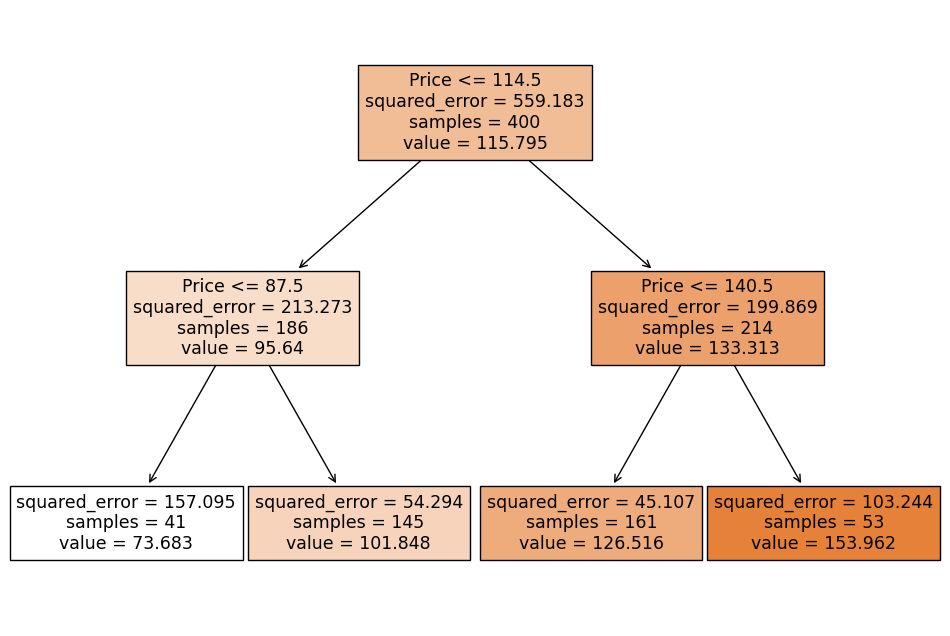

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(12,8),dpi=100)
visiualization =plot_tree(model,feature_names=df2.columns,filled=True)
print(visiualization)

In [ ]:
df3=pd.read_csv('titanic_train.csv')
df3

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
df3.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df3.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df3.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

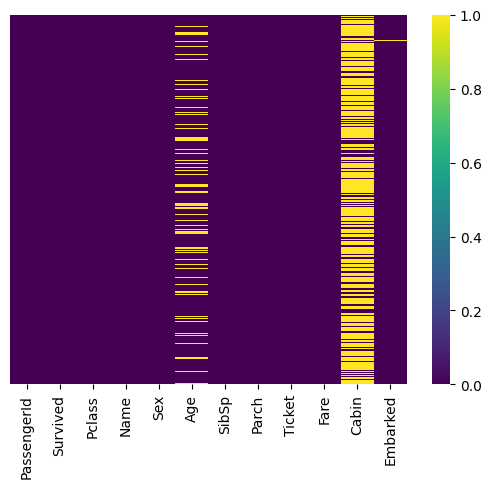

In [ ]:
sns.heatmap(df3.isnull(),yticklabels=False,cbar=True,cmap='viridis')

<Axes: xlabel='Survived', ylabel='count'>

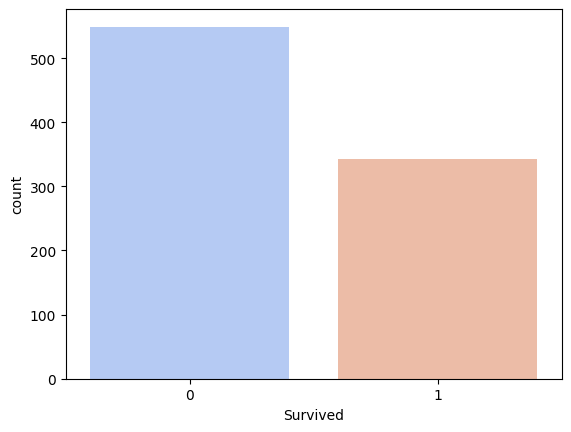

In [ ]:
sns.countplot(x='Survived',data=df3,palette='coolwarm')

<Axes: xlabel='Survived', ylabel='count'>

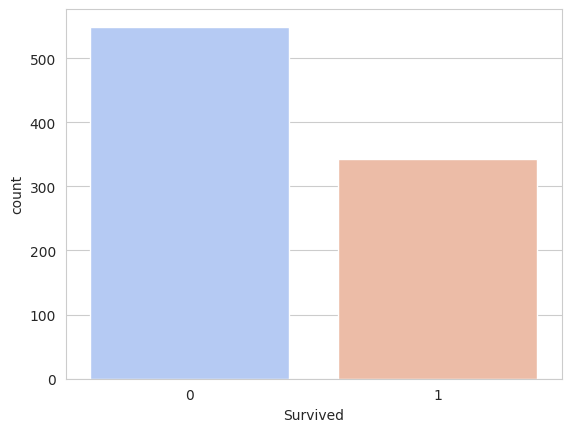

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=df3,palette='coolwarm')

<Axes: xlabel='Survived', ylabel='count'>

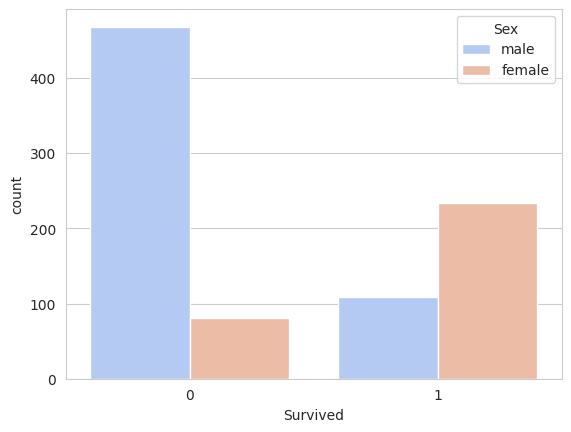

In [ ]:
sns.countplot(x='Survived',data=df3,palette='coolwarm',hue='Sex')

<Axes: xlabel='Survived', ylabel='count'>

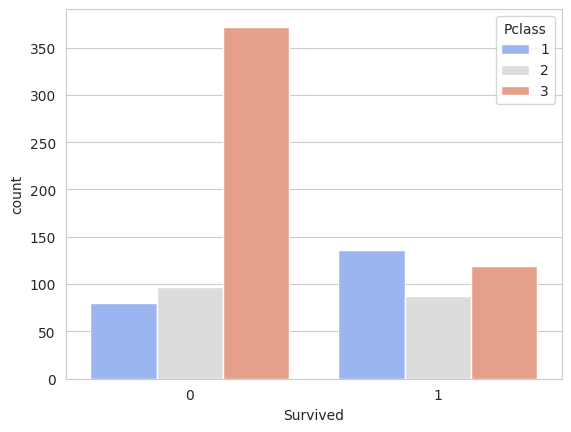

In [ ]:
sns.countplot(x='Survived',data=df3,palette='coolwarm',hue='Pclass')

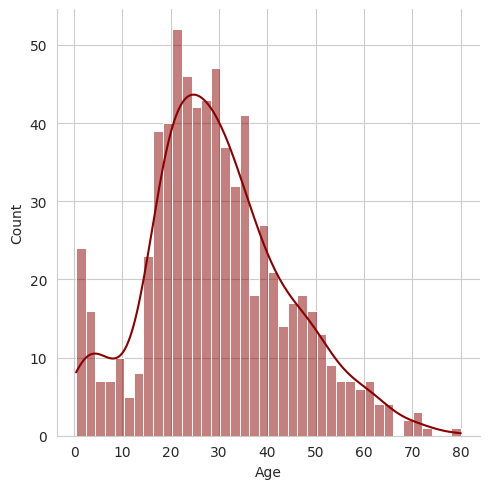

In [ ]:
sns.displot(df3["Age"].dropna() , kde=True , color="darkred",bins=40)

<Axes: >

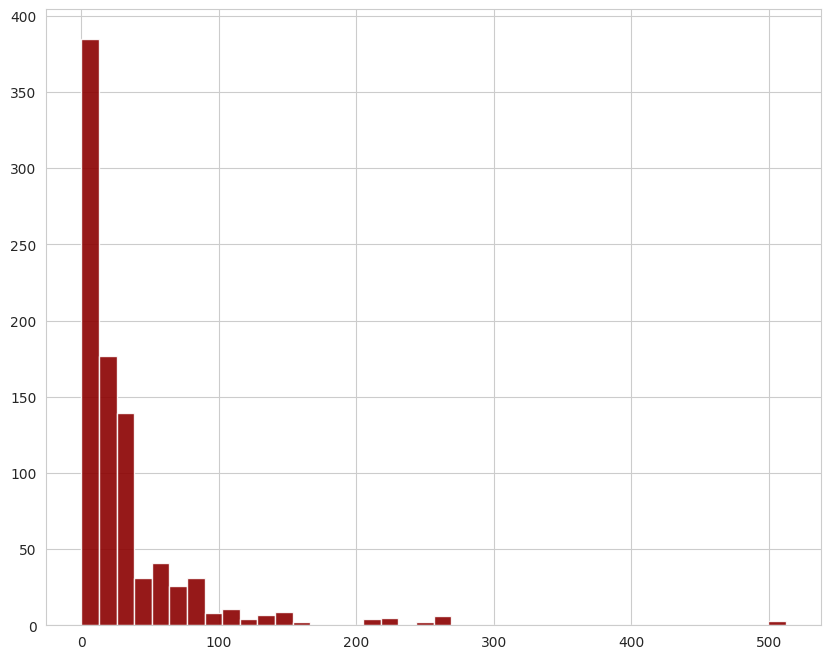

In [ ]:
df3['Fare'].hist(bins=40,color='darkred',alpha=.9,figsize=(10,8))

<Axes: xlabel='Pclass', ylabel='Age'>

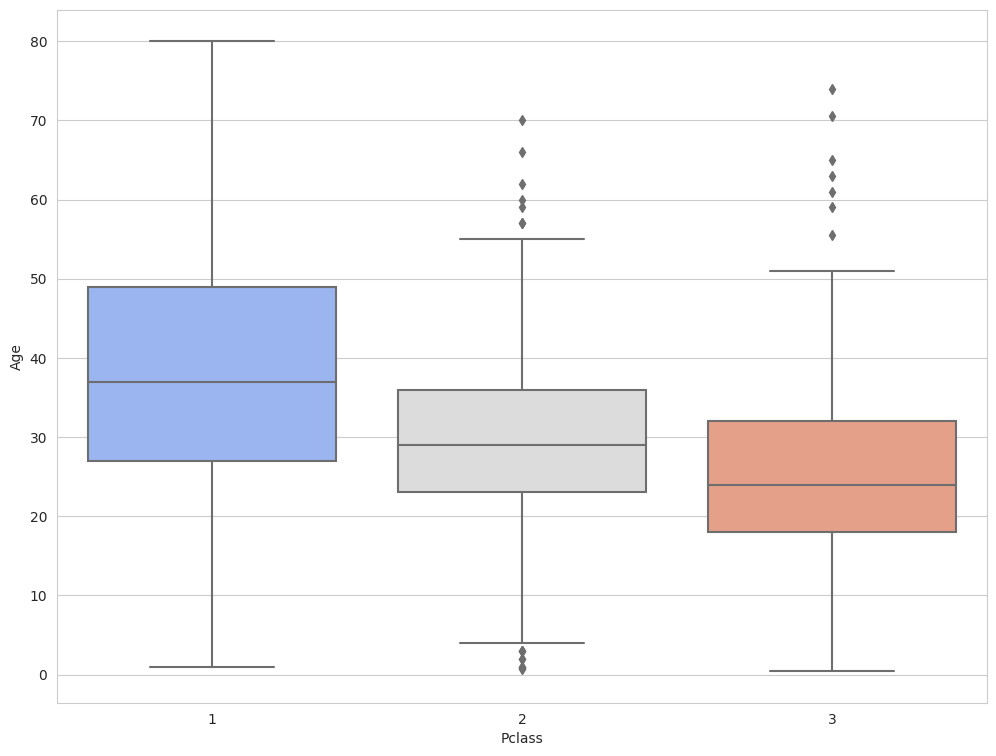

In [ ]:
plt.figure(figsize=(12,9))
sns.boxplot(data=df3,x='Pclass',y='Age',palette='coolwarm')

In [ ]:
def my_age(col):
  Age=col[0]
  Pclass=col[1]
  if pd.isnull(Age):
    if Pclass==1:
     return 37
    elif Pclass==2:
     return 27
    else:
     return 23
  else:
   return Age

In [ ]:
df3['Age']=df3[['Age','Pclass']].apply(my_age,axis=1)

In [ ]:
df3

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,23,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,37,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,23,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,37,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,23,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,37,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,23,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,37,0,0,111369,30.0000,C148,C


In [ ]:
df3

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,23,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,37,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,23,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,37,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,23,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,37,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,23,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,37,0,0,111369,30.0000,C


In [ ]:
df3['Sex']=pd.get_dummies(df3['Sex'],drop_first=True)
df3

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,23,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,37,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",0,23,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,37,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",1,23,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",0,37,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,23,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",1,37,0,0,111369,30.0000,C


In [ ]:
df3['Sex']=pd.get_dummies(df3['Sex'])
df3

ValueError: ignored

In [ ]:
df3['Sex']=pd.get_dummies(df3['Sex'],drop_second=True)
df3

TypeError: ignored

In [ ]:
Sex=pd.get_dummies(df3['Sex'])
df3=pd.concat([Sex,df3],axis=1)
df3

,0,1,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,1,1,0,3,"Braund, Mr. Owen Harris",1,23,1,0,A/5 21171,7.2500,S
1,1,0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,37,1,0,PC 17599,71.2833,C
2,1,0,3,1,3,"Heikkinen, Miss. Laina",0,23,0,0,STON/O2. 3101282,7.9250,S
3,1,0,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,37,1,0,113803,53.1000,S
4,0,1,5,0,3,"Allen, Mr. William Henry",1,23,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,1,887,0,2,"Montvila, Rev. Juozas",1,27,0,0,211536,13.0000,S
887,1,0,888,1,1,"Graham, Miss. Margaret Edith",0,37,0,0,112053,30.0000,S
888,1,0,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,23,1,2,W./C. 6607,23.4500,S
889,0,1,890,1,1,"Behr, Mr. Karl Howell",1,37,0,0,111369,30.0000,C
